# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Alfonsius Ricardo Bano]
- **Email:** [alfonskp13@gmail.com]
- **ID Dicoding:** [alfonsius_ricardo_bano_450z]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola yang terjadi pada jumlah total penyewaan sepeda pada bulan dan waktu tertentu ?
- Seberapa besar perbedaan jumlah penyewaan sepeda pada hari libur dibandingkan dengan hari kerja?
- Bagaimana tren perkembangan jumlah pengguna terdaftar dibandingkan dengan pengguna casual dari tahun ke tahun?
- Bagaimana pengaruh cuaca terhadap pola penyewaan?


## Import Semua Packages/Library yang Digunakan

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [14]:
from google.colab import files
uploaded = files.upload()


Saving day.csv to day (1).csv
Saving hour.csv to hour (1).csv


In [18]:

day_df = pd.read_csv('day.csv')
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [17]:
hour_df = pd.read_csv('hour.csv')
print(hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


### Assessing Data

In [19]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [21]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [27]:
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [24]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
hour_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

### Cleaning Data

In [32]:
day_df.drop_duplicates(inplace=True)

In [30]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

In [33]:
day_df.describe(include="all")

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

#day_df

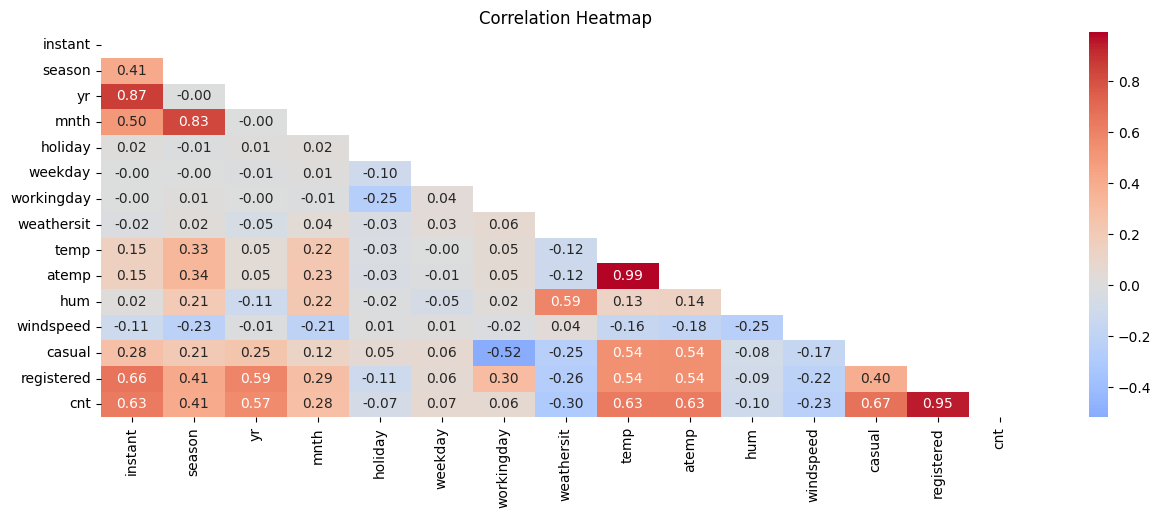

In [34]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

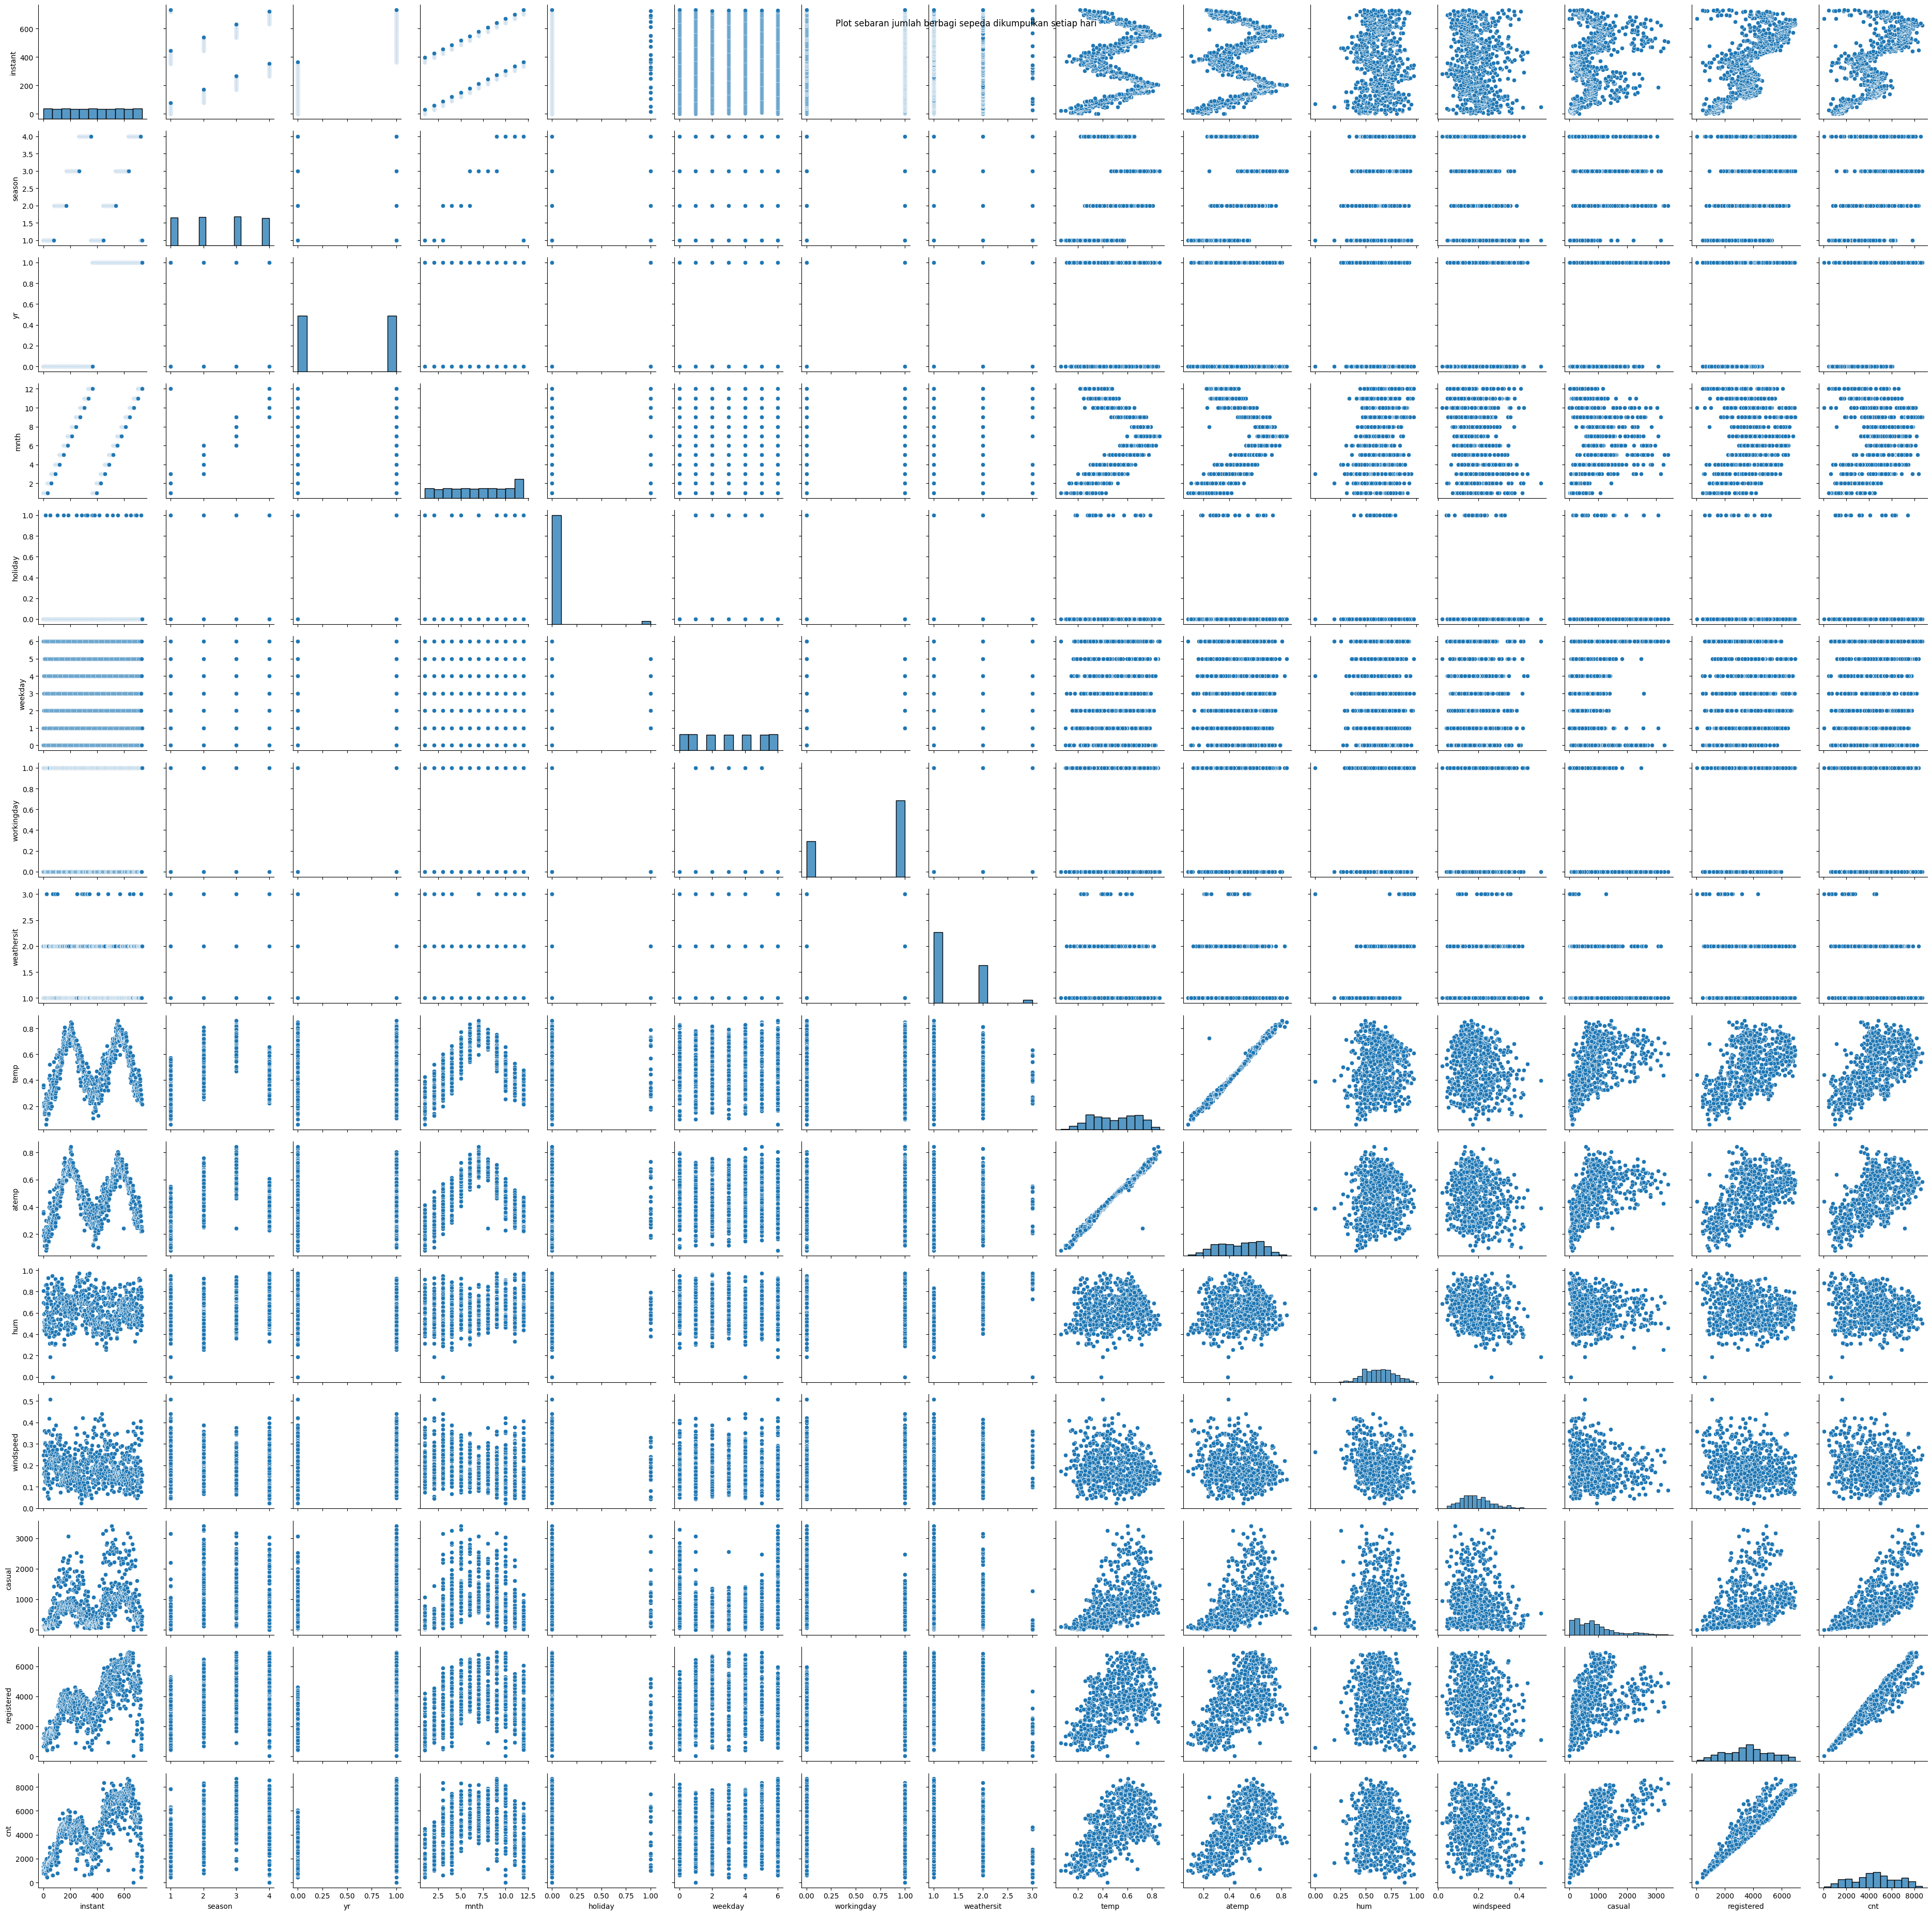

In [35]:
g = sns.pairplot(day_df)
g.fig.suptitle("Plot sebaran jumlah berbagi sepeda dikumpulkan setiap hari")
plt.tight_layout()
plt.show()

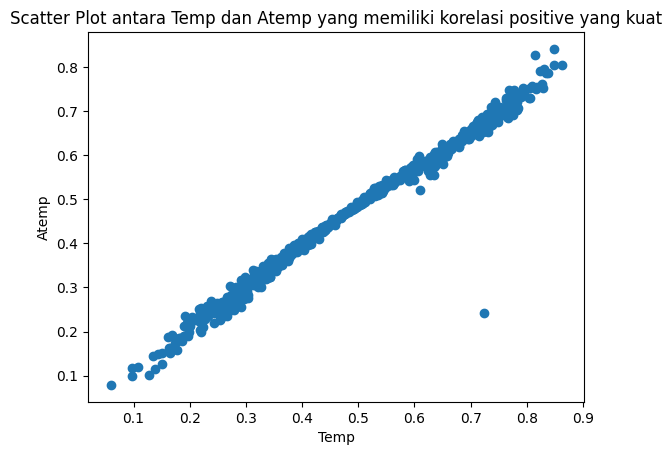

In [36]:
plt.scatter(day_df["temp"], day_df["atemp"])
plt.xlabel("Temp")
plt.ylabel("Atemp")
plt.title("Scatter Plot antara Temp dan Atemp yang memiliki korelasi positive yang kuat")
plt.show()

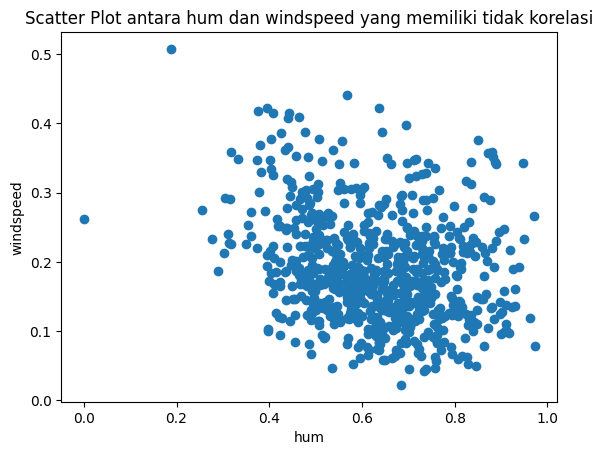

In [37]:
plt.scatter(day_df["hum"], day_df["windspeed"])
plt.xlabel("hum")
plt.ylabel("windspeed")
plt.title("Scatter Plot antara hum dan windspeed yang memiliki tidak korelasi")
plt.show()

In [38]:
day_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

In [39]:
daily_categorical_data = day_df[["season","yr","holiday","workingday","weekday","weathersit"]]

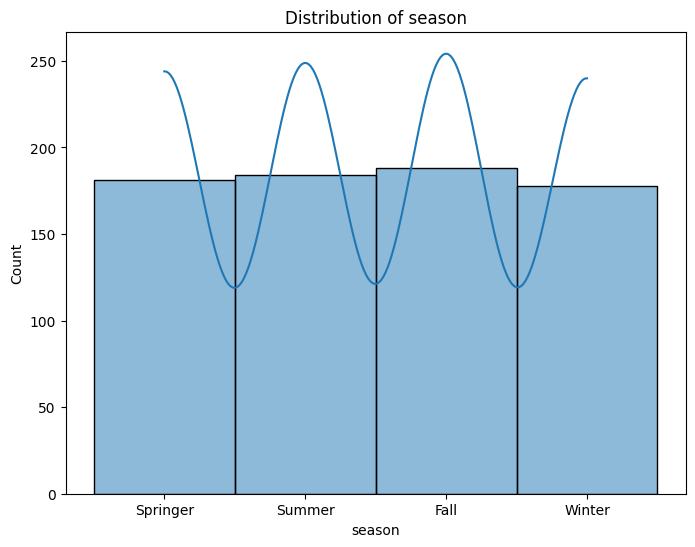

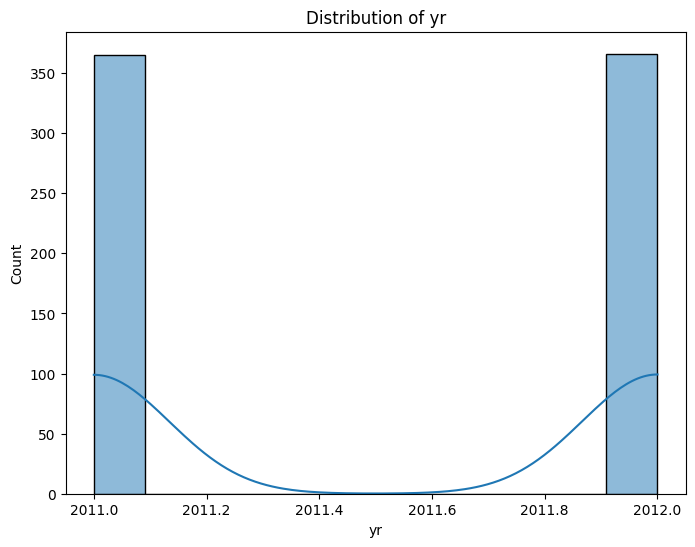

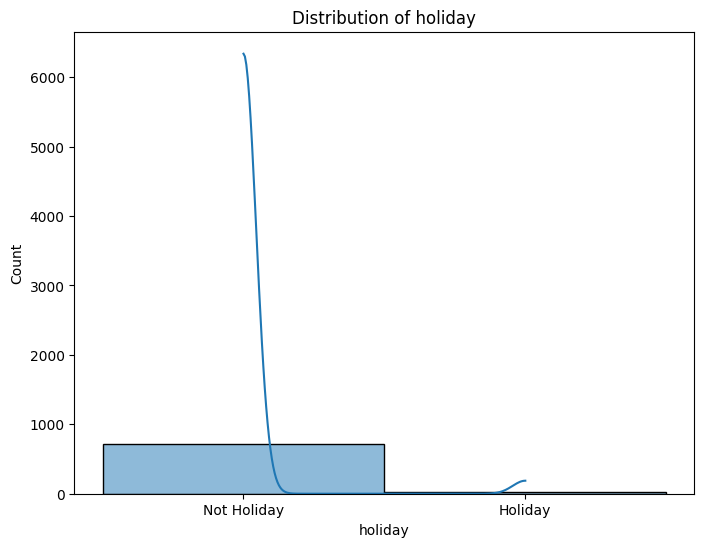

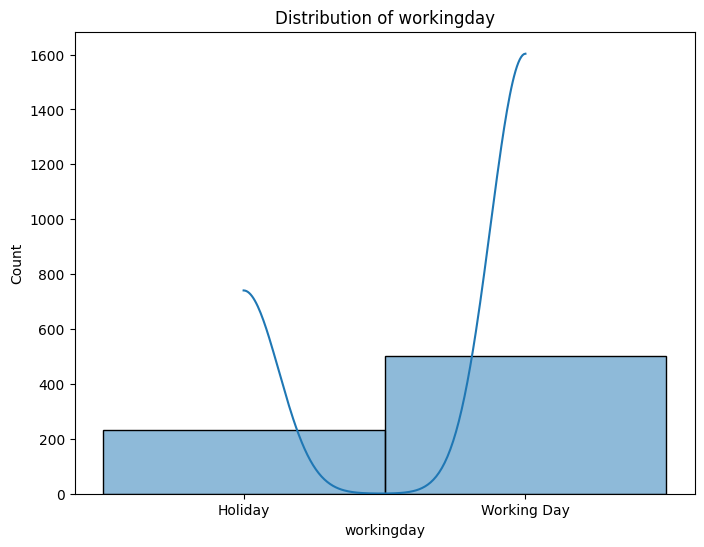

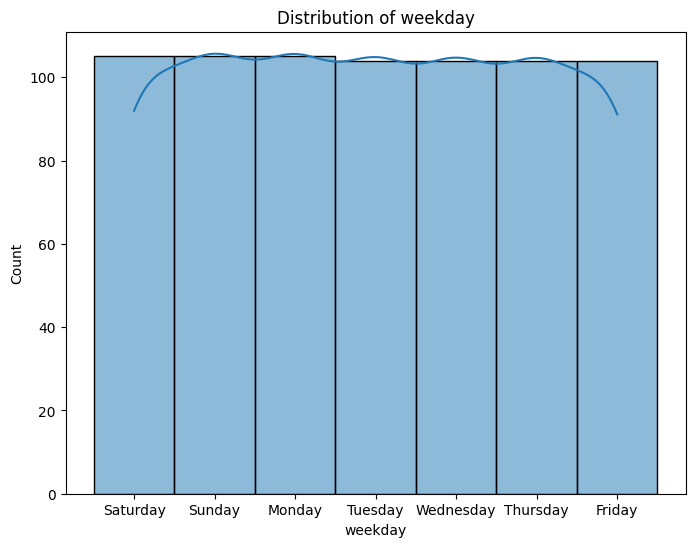

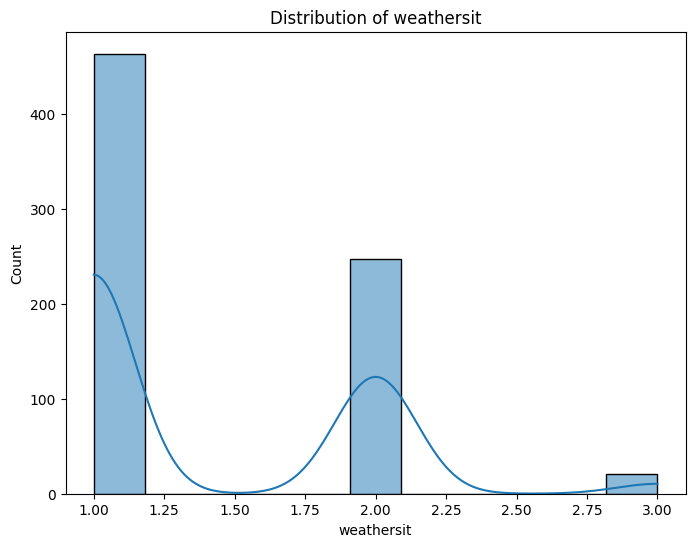

In [40]:
for column in daily_categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [41]:
day_df["temp"] = day_df["temp"].multiply(41)
day_df["atemp"] = day_df["atemp"].multiply(50)
day_df["hum"] = day_df["hum"].multiply(100)
day_df["windspeed"] = day_df["windspeed"].multiply(67)


In [42]:
daily_num_data = day_df[["temp","atemp","hum","windspeed"]]

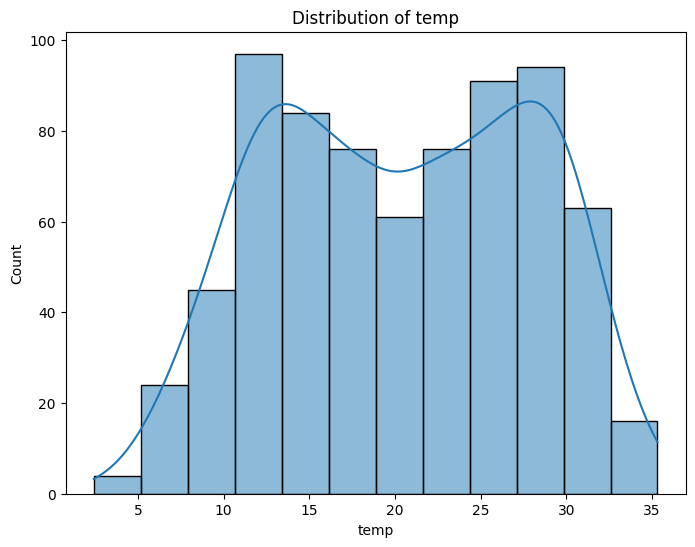

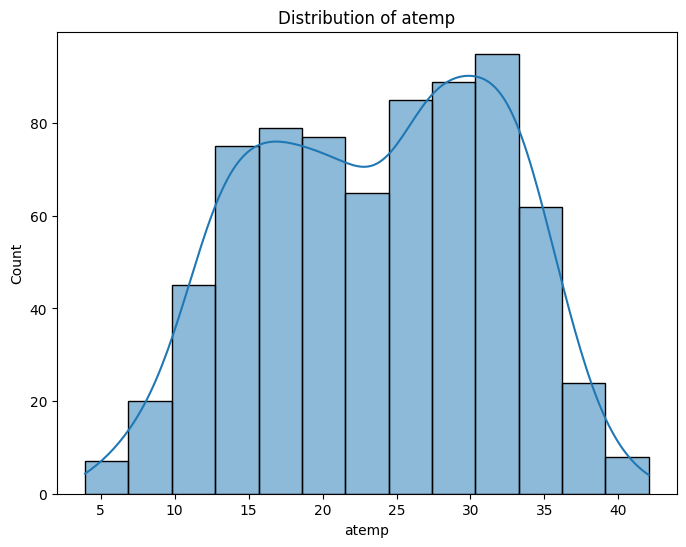

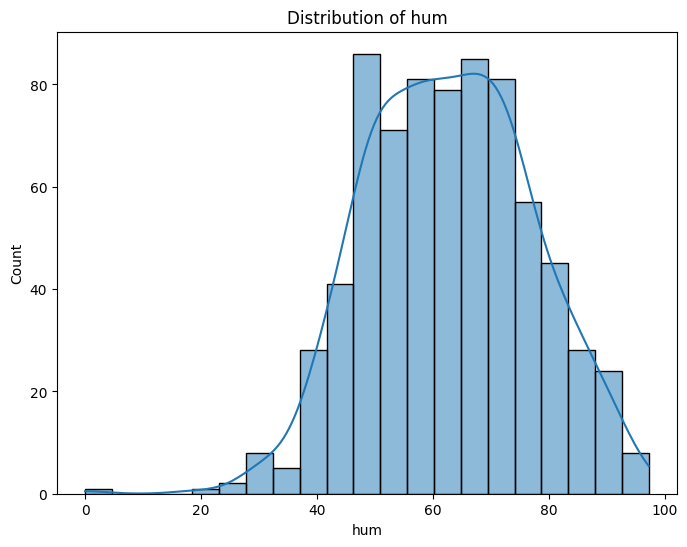

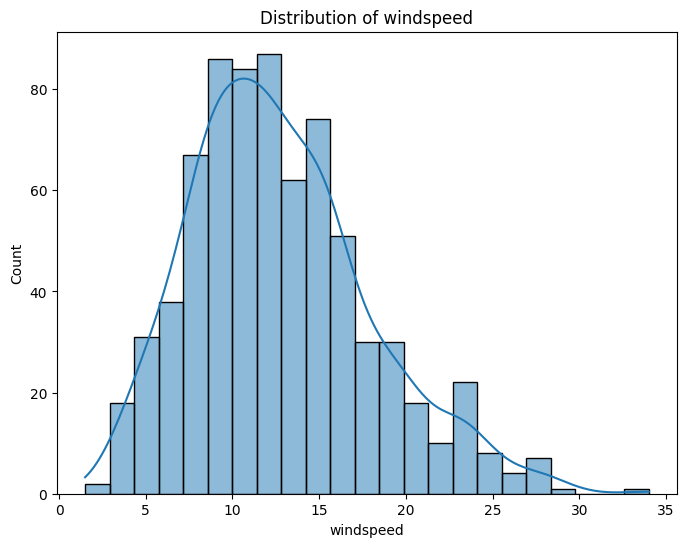

In [43]:
for column in daily_num_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_num_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

#hour_df

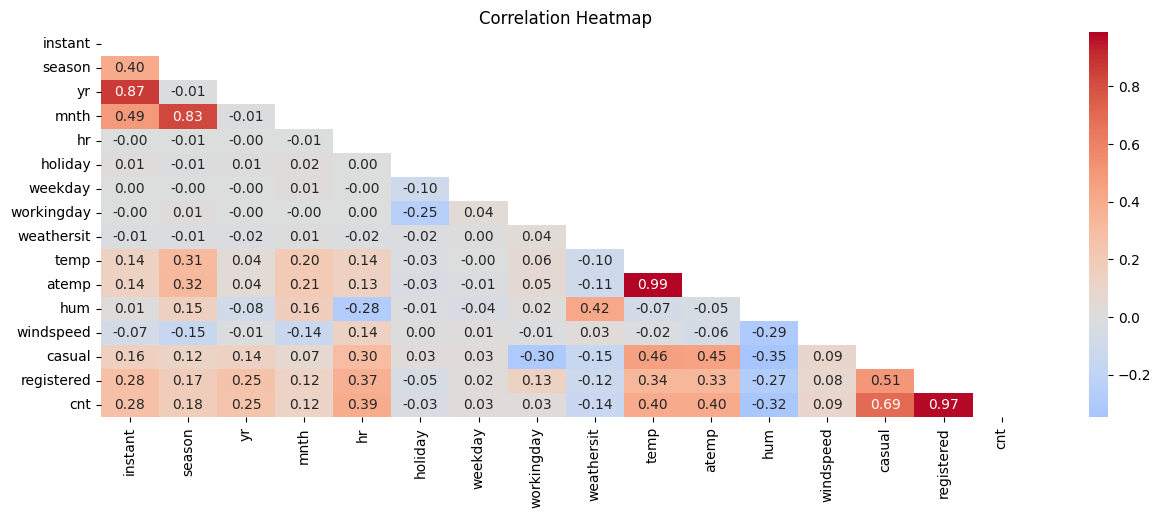

In [44]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

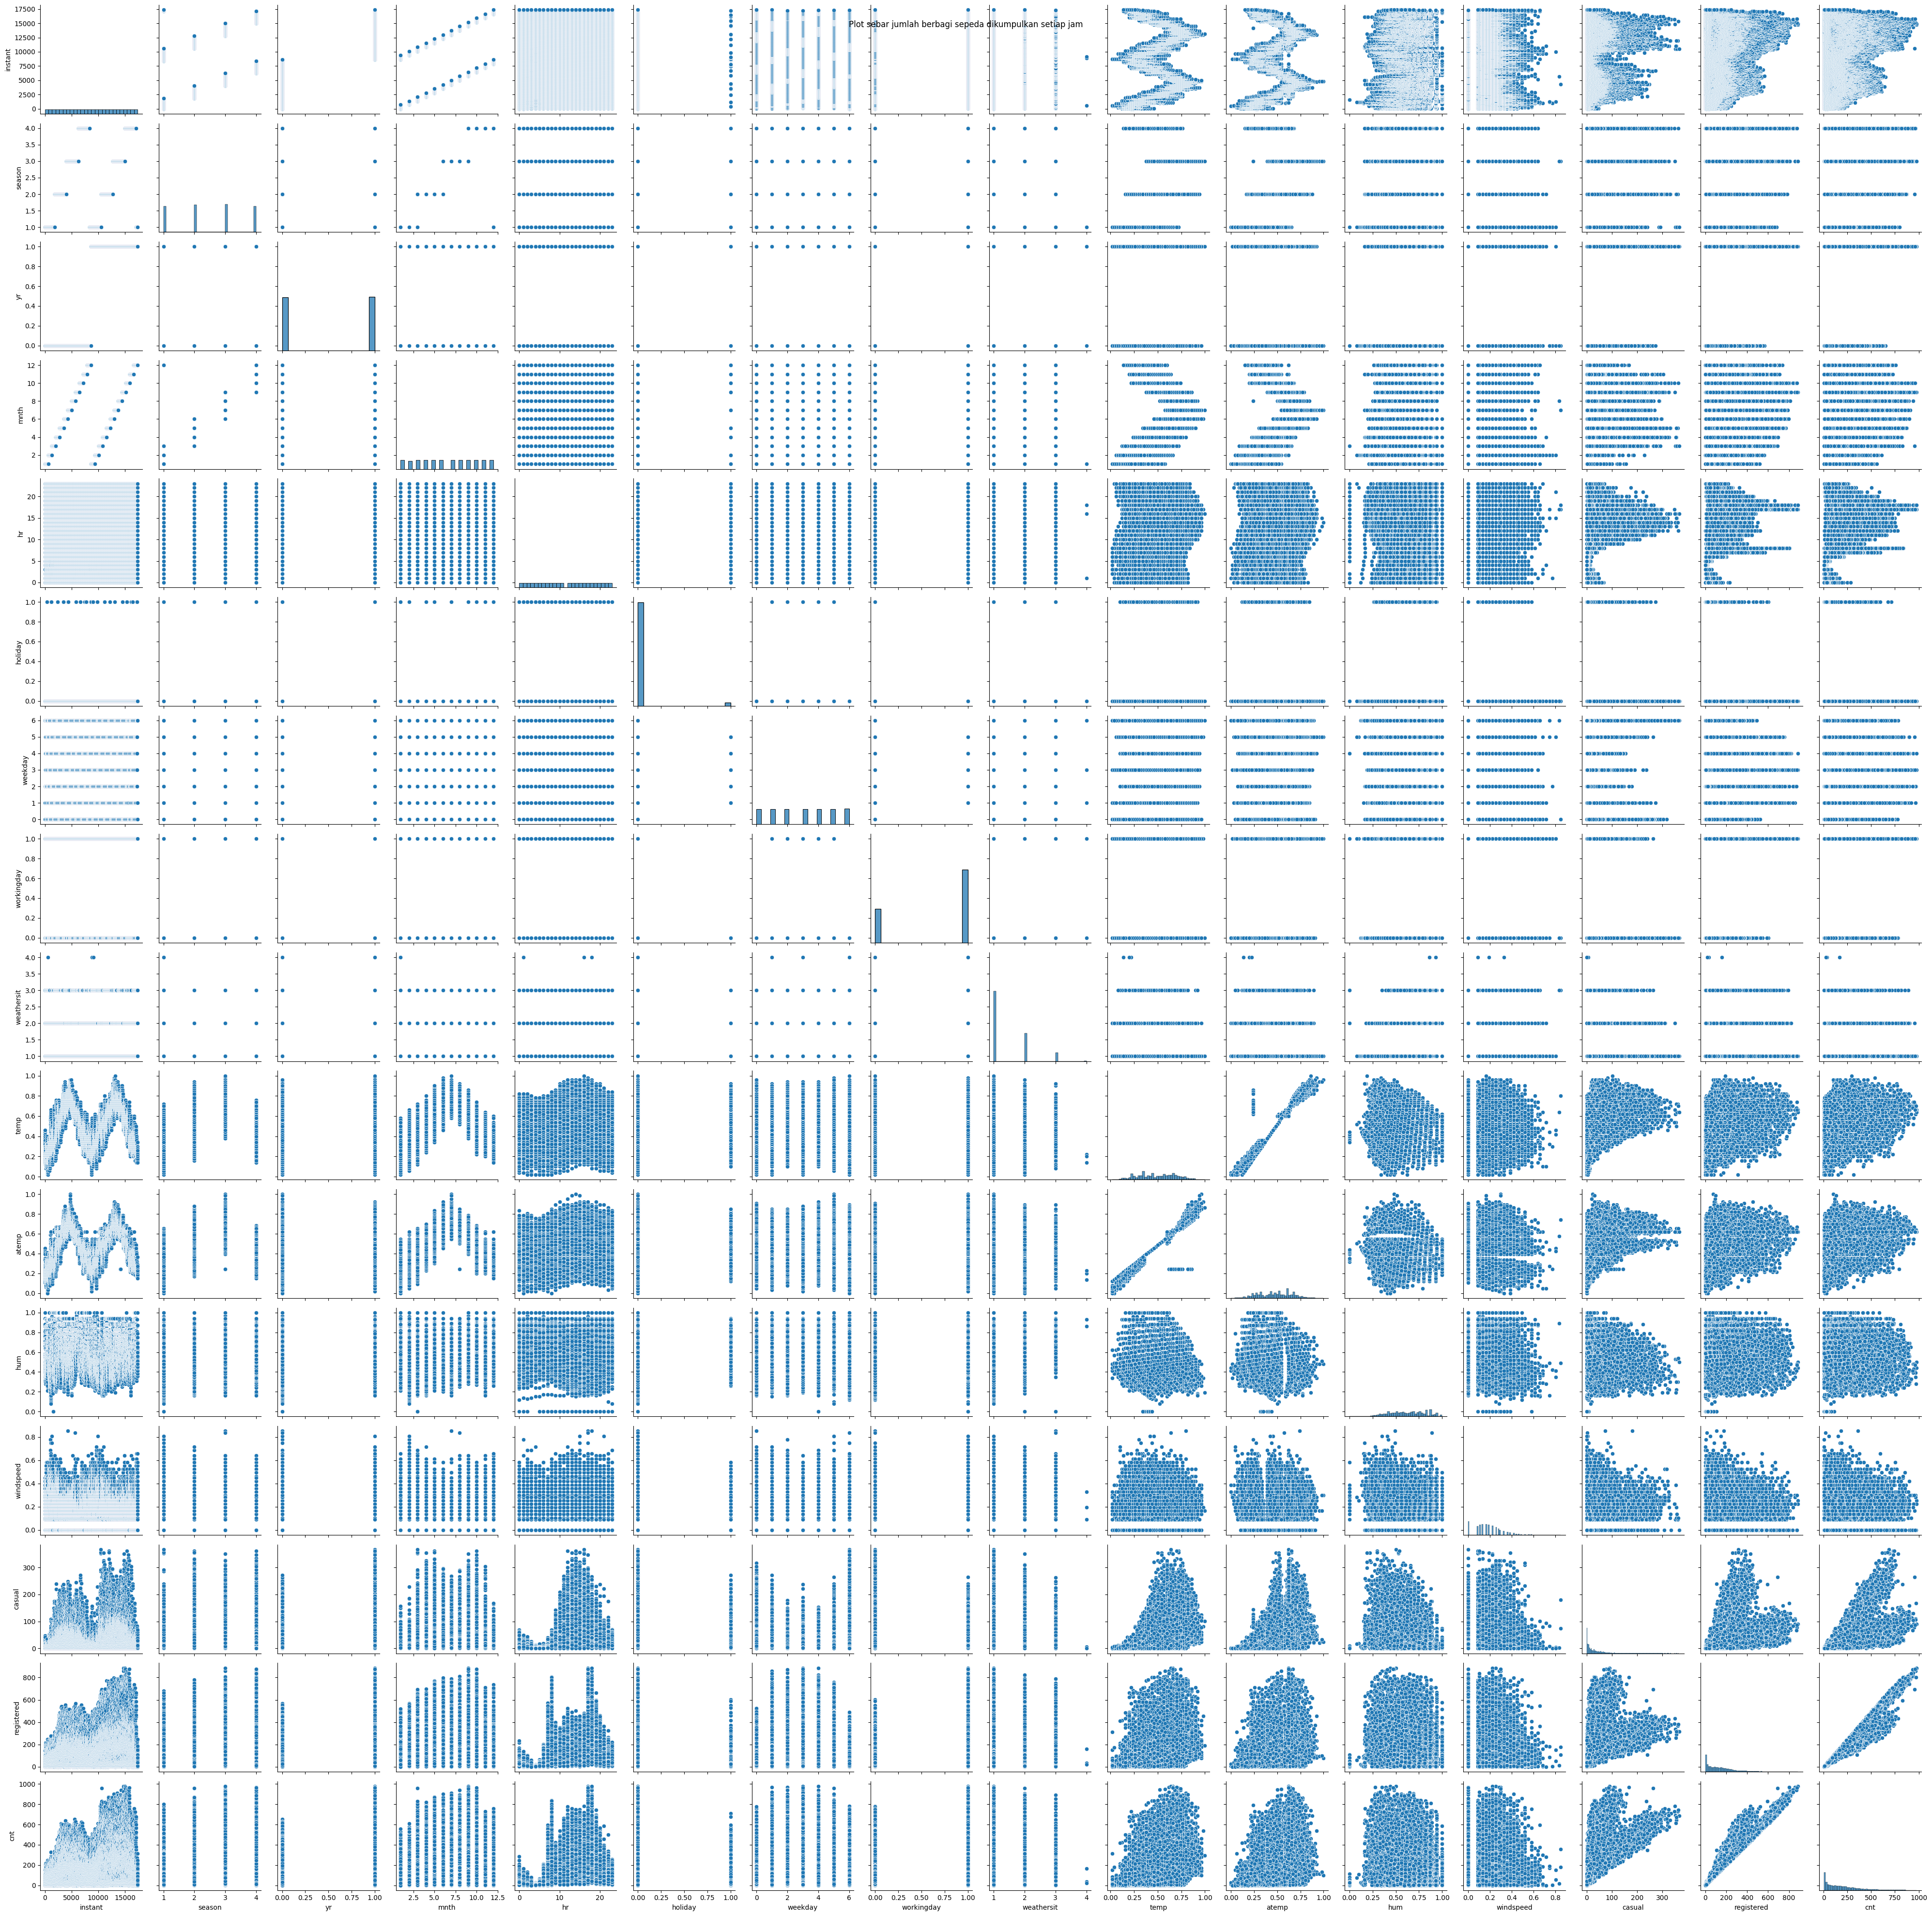

In [45]:
g = sns.pairplot(hour_df)
g.fig.suptitle("Plot sebar jumlah berbagi sepeda dikumpulkan setiap jam")
plt.tight_layout()
plt.show()

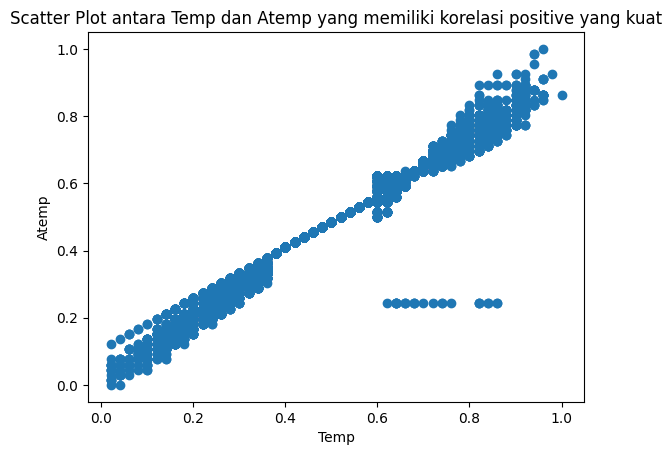

In [47]:
plt.scatter(hour_df["temp"], hour_df["atemp"])
plt.xlabel("Temp")
plt.ylabel("Atemp")
plt.title("Scatter Plot antara Temp dan Atemp yang memiliki korelasi positive yang kuat")
plt.show()

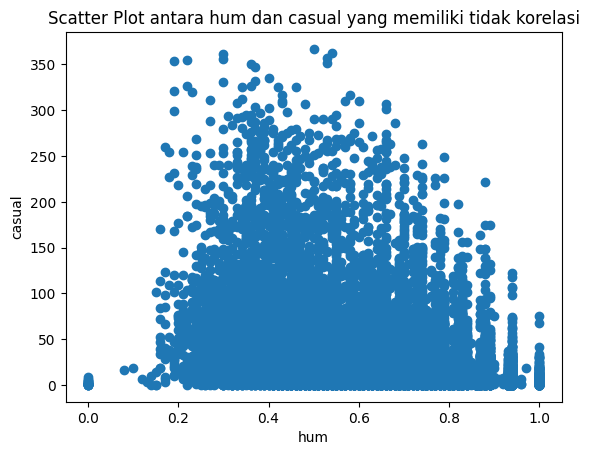

In [48]:
plt.scatter(hour_df["hum"], hour_df["casual"])
plt.xlabel("hum")
plt.ylabel("casual")
plt.title("Scatter Plot antara hum dan casual yang memiliki tidak korelasi")
plt.show()

In [49]:
hour_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Holiday", 1: "Not Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

In [51]:
hour_categorical_data = hour_df[["season","yr","holiday","workingday","weekday","weathersit"]]

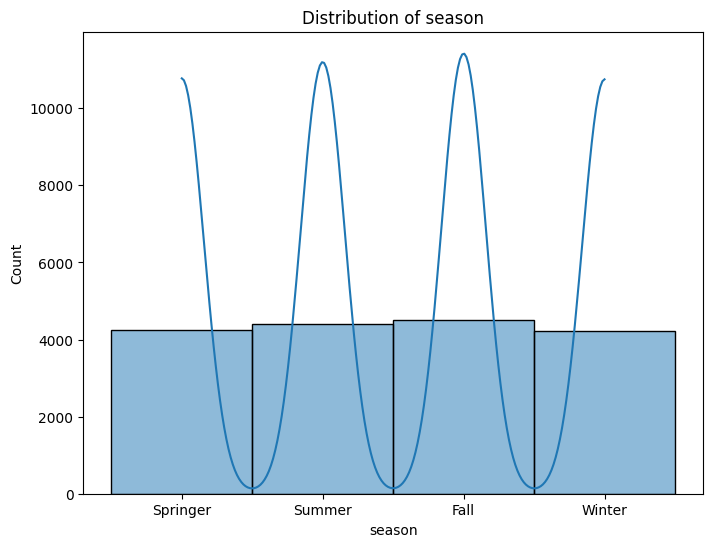

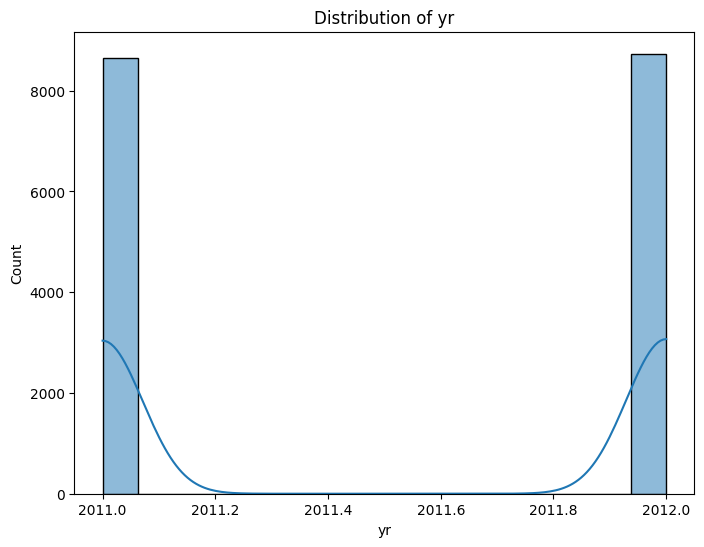

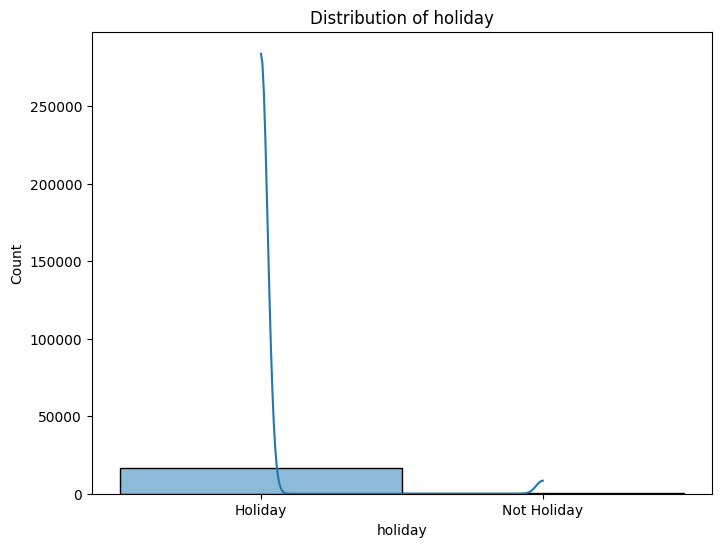

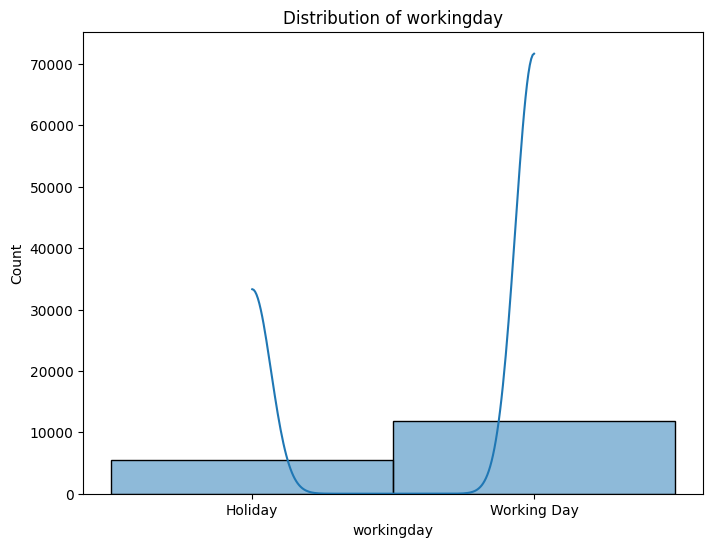

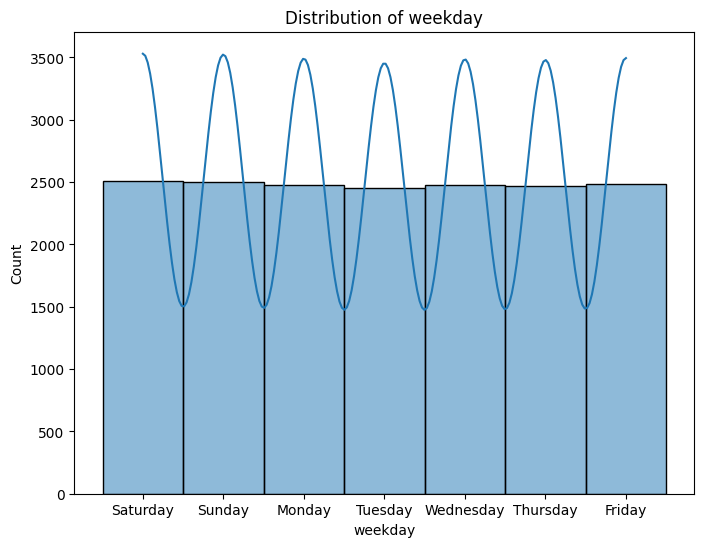

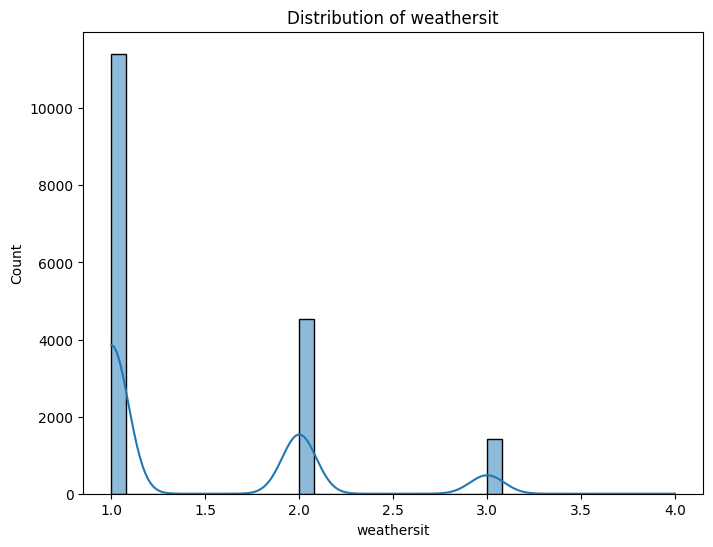

In [52]:
for column in hour_categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(hour_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [53]:
hour_df["temp"] = hour_df["temp"].multiply(41)
hour_df["atemp"] = hour_df["atemp"].multiply(50)
hour_df["hum"] = hour_df["hum"].multiply(100)
hour_df["windspeed"] = hour_df["windspeed"].multiply(67)

In [54]:
hour_num_data = hour_df[["temp","atemp","hum","windspeed"]]

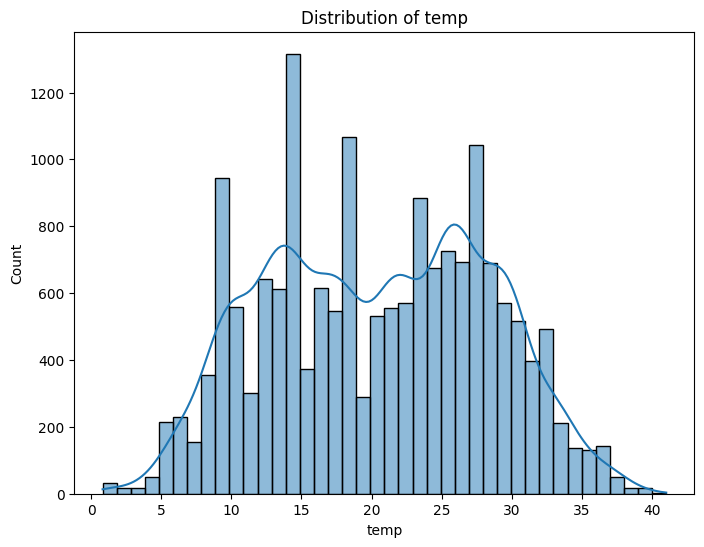

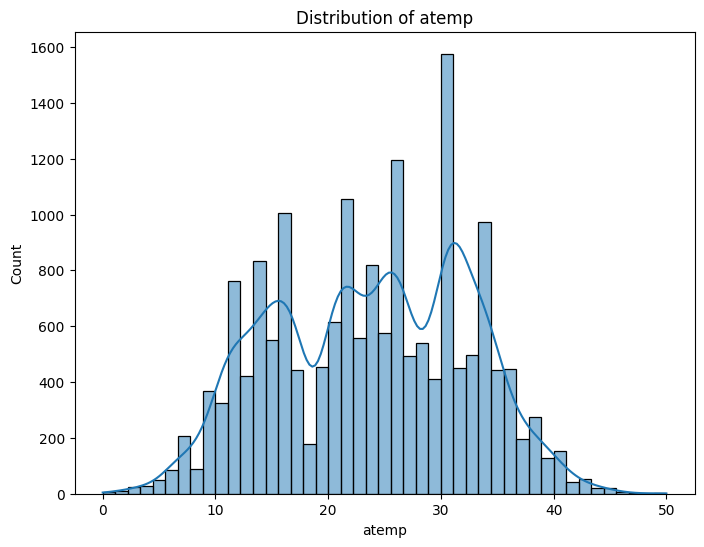

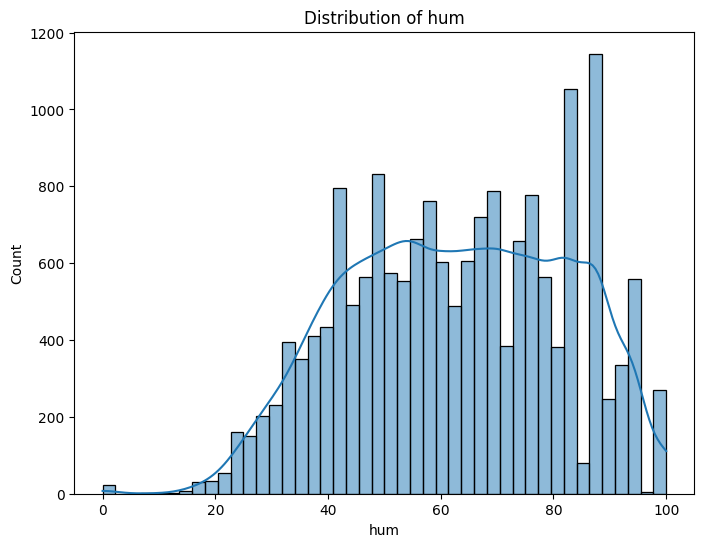

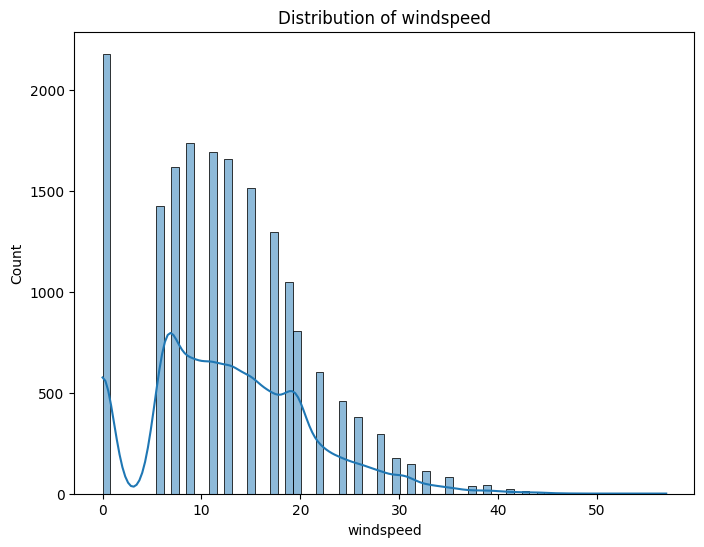

In [55]:
for column in hour_num_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=hour_num_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

## Visualization & Explanatory Analysis

#pertanyaan 1
- Bagaimana pola yang terjadi pada jumlah total penyewaan sepeda pada bulan dan waktu tertentu ?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


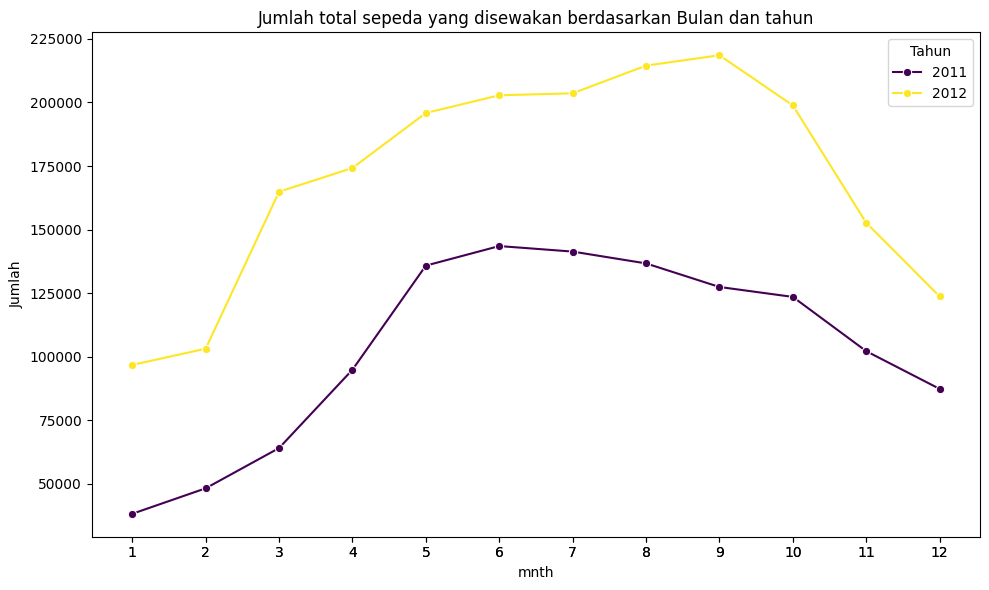

In [67]:
monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x="mnth", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=monthly_counts["mnth"], labels=monthly_counts["mnth"])
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


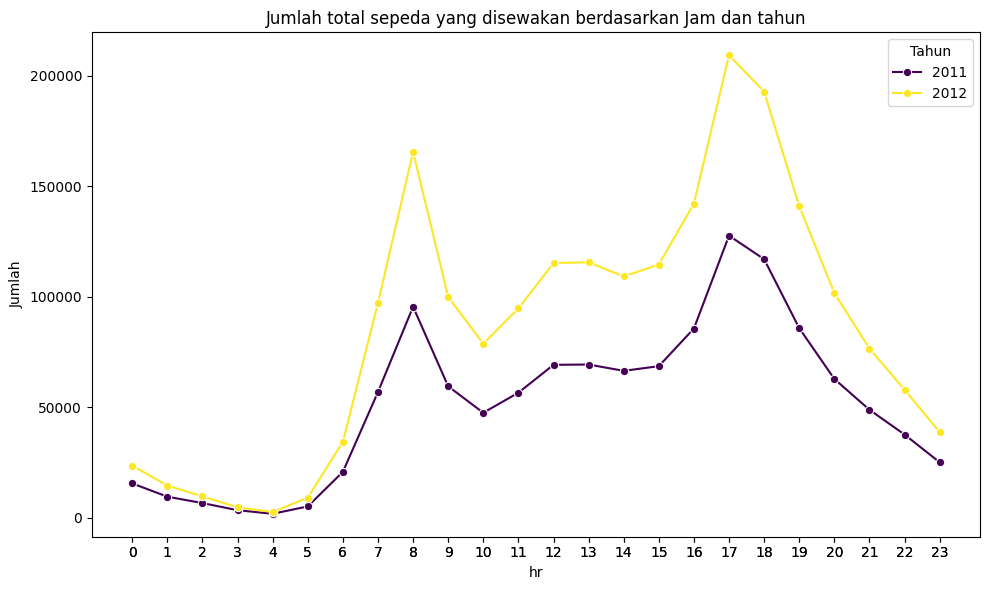

In [69]:
hourly_counts = hour_df.groupby(by=["hr","yr"]).agg({
    "cnt": "sum"
}).reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts, x="hr", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Jam dan tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=hourly_counts["hr"], labels=hourly_counts["hr"])
plt.tight_layout()
plt.show()

#pertanyaan 2
- Seberapa besar perbedaan jumlah penyewaan sepeda pada hari libur dibandingkan dengan hari kerja?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


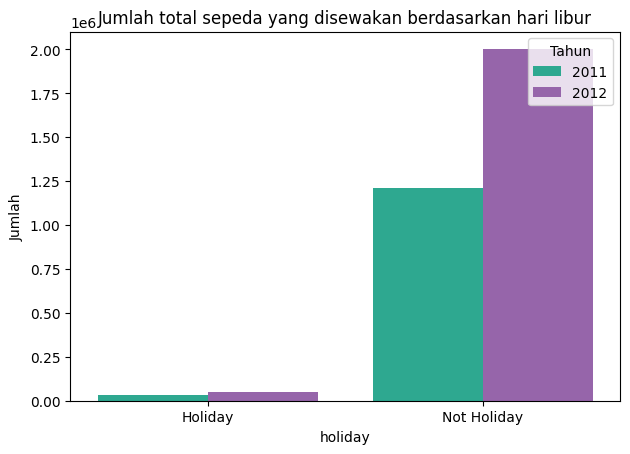

In [79]:
holiday_counts = day_df.groupby(by=["holiday","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=holiday_counts, x="holiday", y="cnt", hue="yr", palette=["#1abc9c", "#9b59b6"])
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan hari libur")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


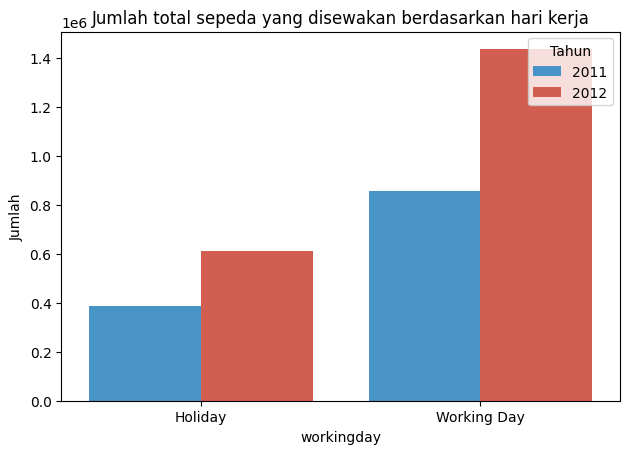

In [78]:
working_counts = day_df.groupby(by=["workingday","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=working_counts, x="workingday", y="cnt", hue="yr", palette=["#3498db", "#e74c3c"])
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan hari kerja")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

#pertanyaan 3
- Bagaimana tren perkembangan jumlah pengguna terdaftar dibandingkan dengan pengguna casual dari tahun ke tahun?

In [57]:
casual_year_counts = day_df.groupby("yr")["casual"].sum()
casual_year_counts = casual_year_counts.reset_index()
casual_year_counts.columns = ["yr", "total_casual"]

In [58]:
casual_year_counts

yr  total_casual
0  2011        247252
1  2012        372765

In [59]:
reg_year_counts = day_df.groupby("yr")["registered"].sum()
reg_year_counts = reg_year_counts.reset_index()
reg_year_counts.columns = ["yr", "total_registered"]

In [60]:
reg_year_counts

yr  total_registered
0  2011            995851
1  2012           1676811

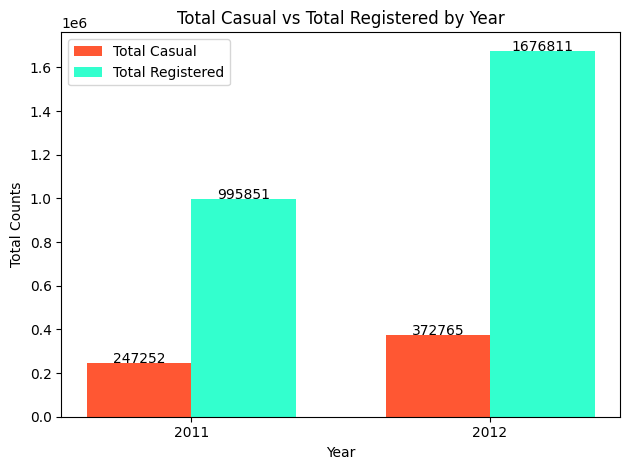

In [64]:
index = casual_year_counts["yr"]
bar_width = 0.35

p1 = plt.bar(index, casual_year_counts["total_casual"], bar_width, label="Total Casual", color="#FF5733")
p2 = plt.bar(index + bar_width, reg_year_counts["total_registered"], bar_width, label="Total Registered", color="#33FFCE")

plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.title("Total Casual vs Total Registered by Year")
plt.xticks(index + bar_width / 2, casual_year_counts["yr"])
plt.legend()
for p in p1 + p2:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 1, str(int(height)), ha="center")
plt.tight_layout()
plt.show()


#pertanyaan 4
- Bagaimana pengaruh cuaca terhadap pola penyewaan?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


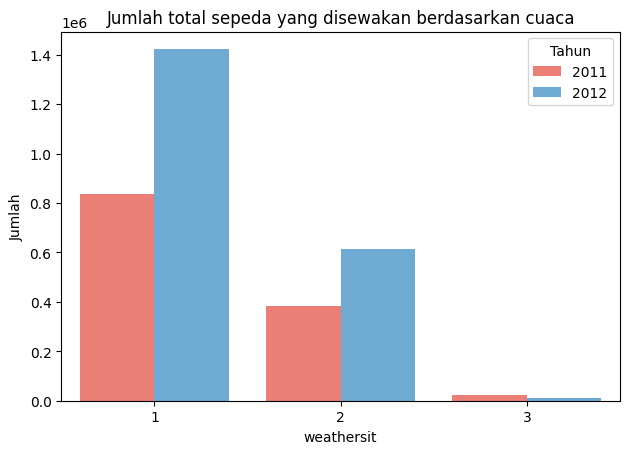

In [82]:
weather_counts = day_df.groupby(by=["weathersit", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=weather_counts, x="weathersit", y="cnt", hue="yr", palette=["#FF6F61", "#5DADE2"])
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan cuaca")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

## Conclusion

- Melalui grafik yang diperoleh dari analisis pada DataFrame bike_day_df, dapat disimpulkan bahwa bulan September (bulan ke-9) di tahun 2012 mencatat jumlah penyewaan sepeda tertinggi. Sementara itu, di tahun 2011, bulan dengan penyewaan terbanyak adalah Juni (bulan ke-6).
- Analisis grafik dari DataFrame hour_df menunjukkan bahwa waktu penyewaan sepeda paling banyak terjadi pada pukul 17.00 (5 sore). Meski demikian, terdapat juga puncak penyewaan yang cukup signifikan di pagi hari menjelang siang, khususnya pada pukul 08.00, meskipun angkanya tidak setinggi yang terlihat pada sore hari.
- Dapat dilihat bahwa pada tahun 2011 dan 2012, hari-hari biasa mencatat jumlah penyewaan sepeda yang jauh lebih tinggi dibandingkan dengan hari libur. Temuan ini didasarkan pada visualisasi data dari DataFrame bike_day_df, menunjukkan bahwa hari kerja berkontribusi secara signifikan terhadap angka penyewaan sepeda.
- Dari hasil analisis visualisasi pada DataFrame bike_day_df yang mengkaji hubungan antara kolom weathersit dan yr, dapat disimpulkan bahwa baik pada tahun 2011 maupun 2012, penyewaan sepeda tertinggi terjadi dalam kondisi cuaca yang optimal (nomor 1: Cerah, Beberapa Awan, dan Sebagian Berawan), sedangkan penyewaan terendah terjadi saat kondisi cuaca buruk (nomor 3: Salju Ringan, Hujan Ringan + Petir + Awan Bertebaran).